# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [ ]:
# Instalação de bibliotecas básicas
!pip install pandas
!pip install matplotlib
!pip install beautifulsoup4
!pip install requests
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.5 MB/s eta 0:00:00


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [ ]:
# Responda aqui a primeira etapa
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv')
df.info()
print(df.describe())
print(f'Shape: {df.shape}')
print(f'Valores faltantes: {df.isnull().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

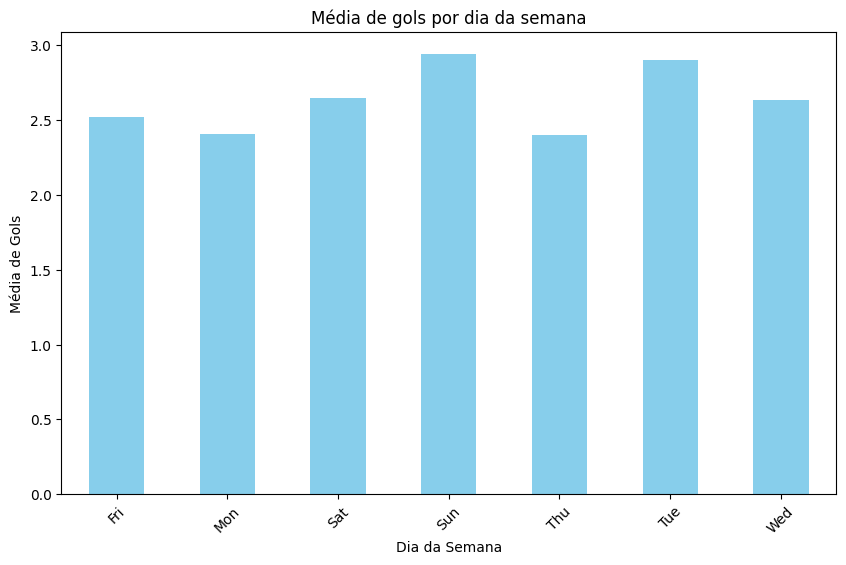

In [ ]:
# Responda aqui a etapa

import matplotlib.pyplot as plt

df['total_gols'] = df['gf'] + df['ga']

gols_por_dia = df.groupby('day')['total_gols'].mean()

plt.figure(figsize=(10, 6))
gols_por_dia.plot(kind='bar', color='skyblue')
plt.title('Média de gols por dia da semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols')
plt.xticks(rotation=45)
plt.show()



## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

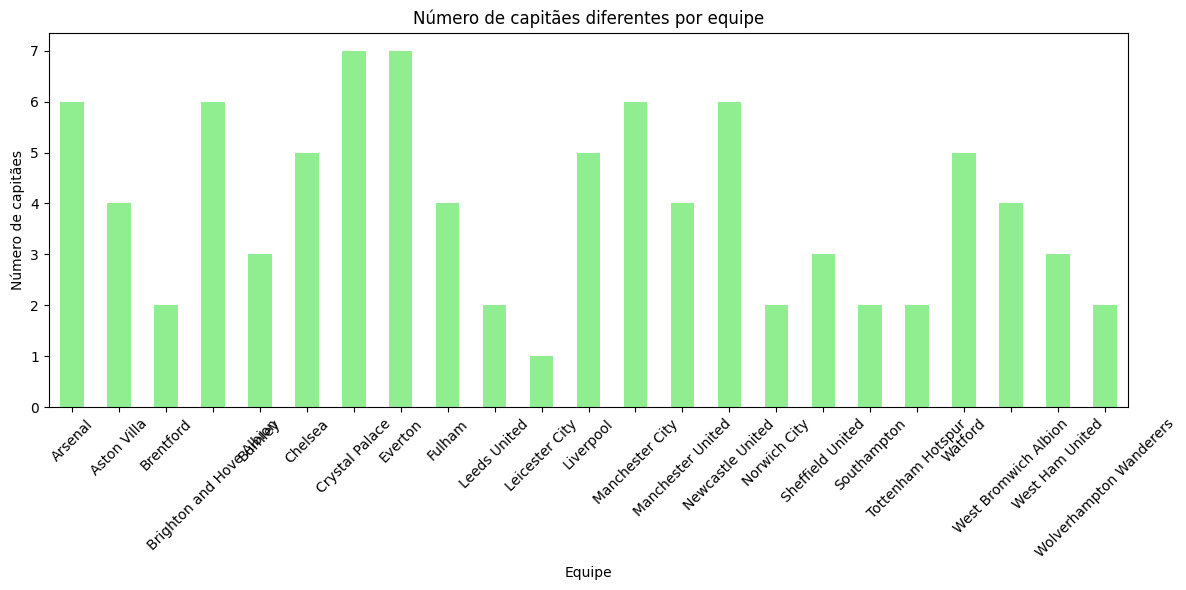

In [ ]:
# Responda a etapa aqui

capitaes_por_equipe = df.groupby('team')['captain'].nunique()

plt.figure(figsize=(12, 6))
capitaes_por_equipe.plot(kind='bar', color='lightgreen')
plt.title('Número de capitães diferentes por equipe')
plt.xlabel('Equipe')
plt.ylabel('Número de capitães')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

<Figure size 1200x800 with 0 Axes>

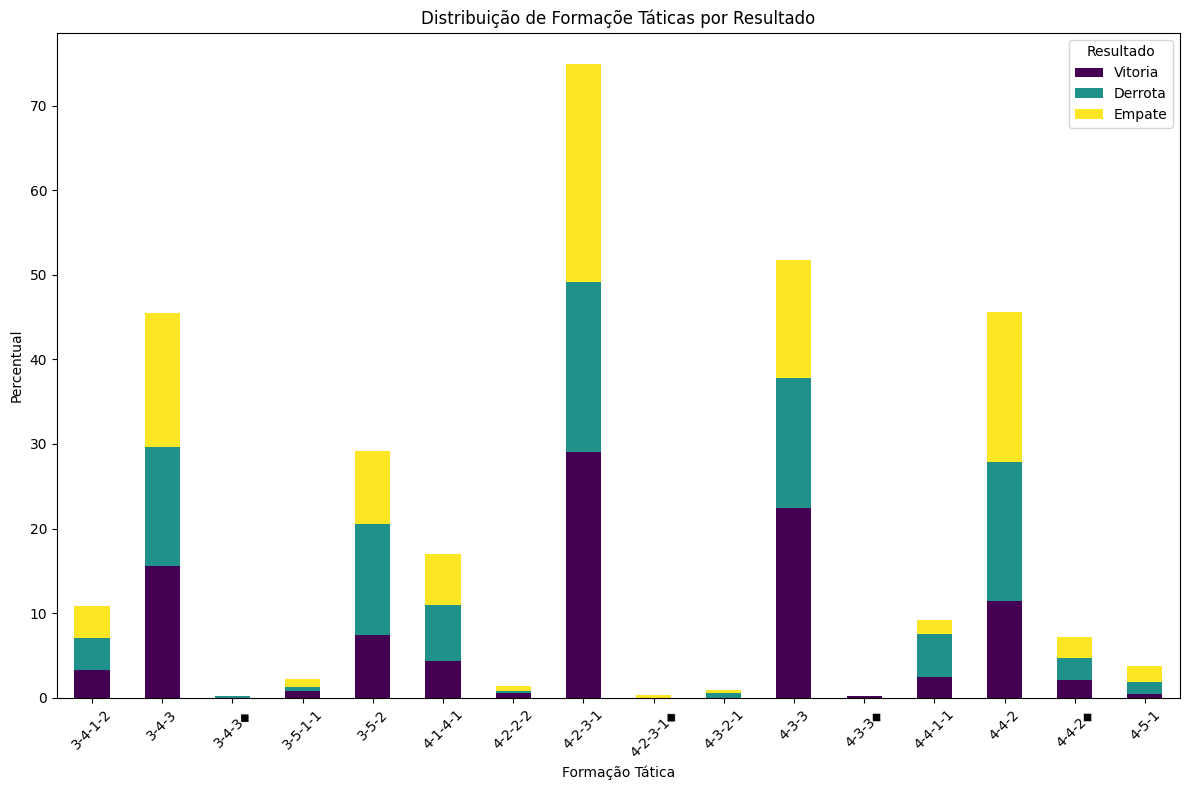

In [ ]:
# Responda a etapa aqui


vitorias = df[df['result'] == 'W']['formation']
derrotas = df[df['result'] == 'L']['formation']
empates = df[df['result'] == 'D']['formation']

total_vitorias = vitorias.value_counts()
total_derrotas = derrotas.value_counts()
total_empates = empates.value_counts()

formacao = pd.DataFrame({
    'Vitoria': total_vitorias,
    'Derrota': total_derrotas,
    'Empate': total_empates,
}).fillna(0)

formacao = formacao.div(formacao.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12, 8))

formacao.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

plt.title('Distribuição de Formaçõe Táticas por Resultado')
plt.xlabel('Formação Tática')
plt.ylabel('Percentual')
plt.xticks(rotation=45)
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()



## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

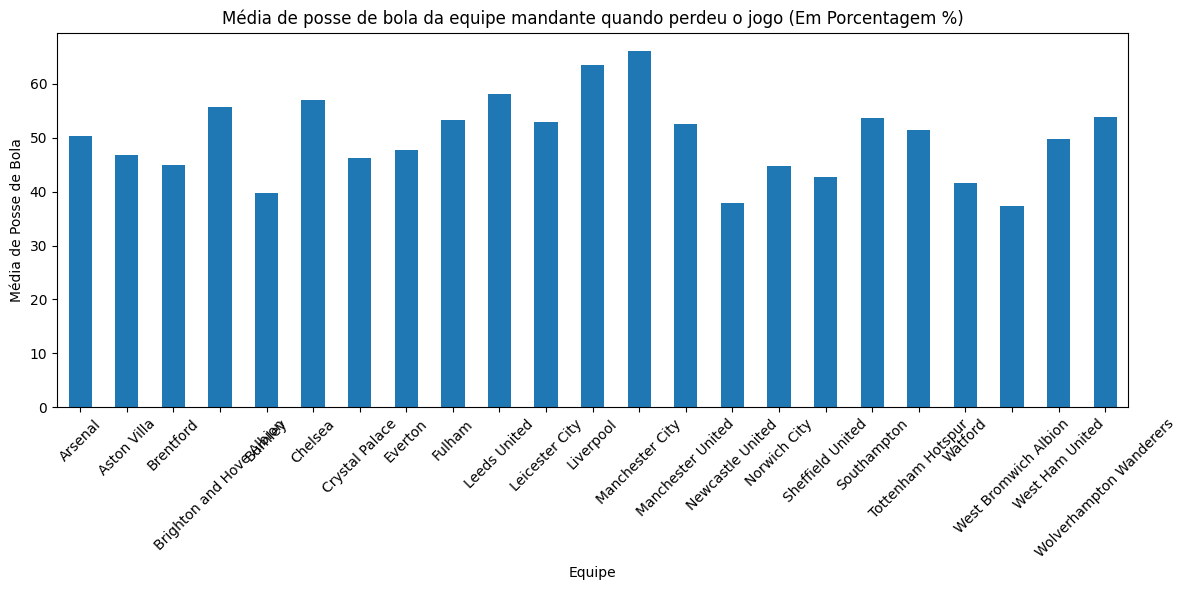

In [116]:
# Responda aqui a etapa

media_posse_mandante = df[(df['venue'] == 'Home') & (df['result'] == 'L')].groupby('team')['poss'].mean()

plt.figure(figsize=(12, 6))
media_posse_mandante.plot(kind='bar')
plt.title('Média de posse de bola da equipe mandante quando perdeu o jogo (Em Porcentagem %)')
plt.xlabel('Equipe')
plt.ylabel('Média de Posse de Bola')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

erro ao carregar imagem
erro ao carregar imagem


Posição,Equipe,Pontos,Brasão
1,Manchester City,166,
2,Chelsea,132,
3,Manchester United,128,
4,Arsenal,121,
5,Tottenham Hotspur,120,
6,West Ham United,117,
7,Leicester City,108,
8,Wolverhampton Wanderers,94,
9,Leeds United,93,
10,Aston Villa,92,

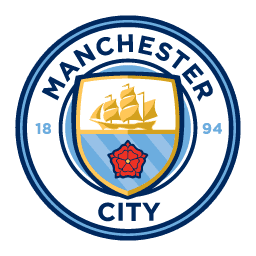
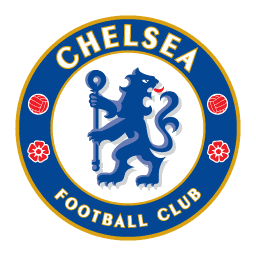
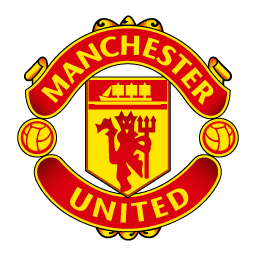
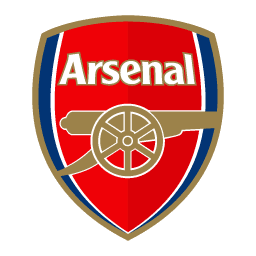
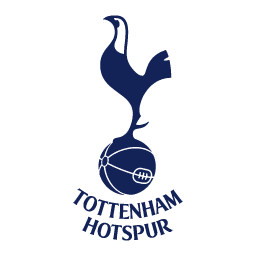
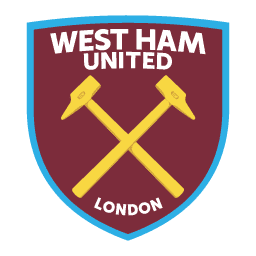
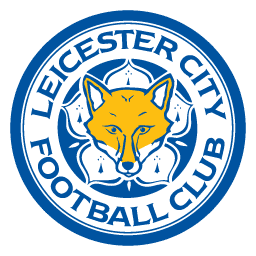
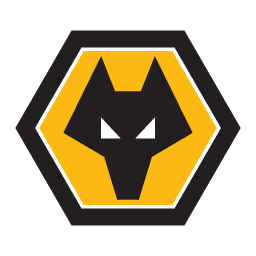
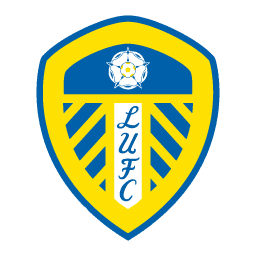
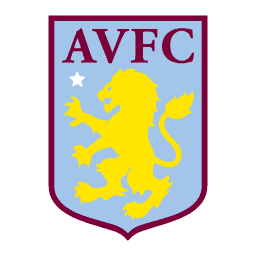
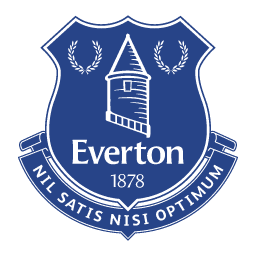
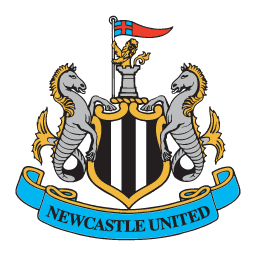
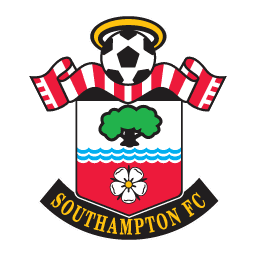
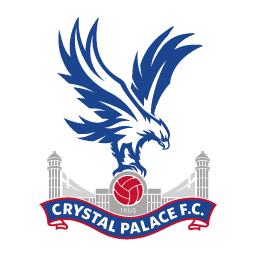
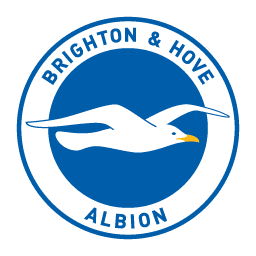
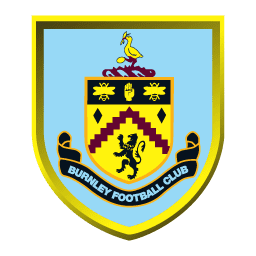
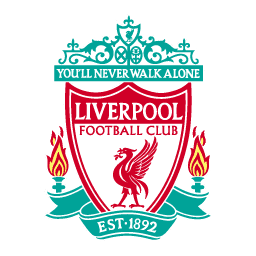
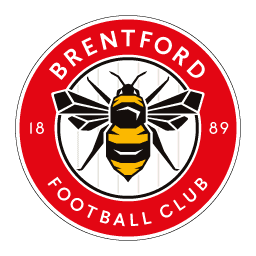
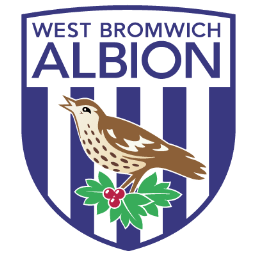
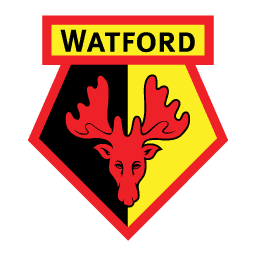
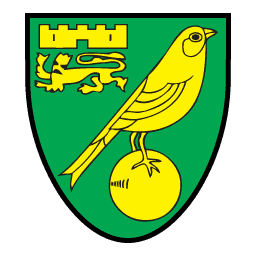

In [ ]:
import base64
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML

def carregar_imagem(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"erro ao carregar imagem")
        return None

def pegar_logo_url(nome_time):
    logo_urls = {
        'Manchester City': 'https://logodetimes.com/times/manchester-city-football-club/manchester-city-football-club-256.png',
        'Liverpool': 'https://logodetimes.com/times/liverpool-football-club/liverpool-football-club-256.png',
        'Chelsea': 'https://logodetimes.com/times/chelsea-football-club/chelsea-football-club-256.png',
        'Manchester United': 'https://logodetimes.com/times/manchester-united-football-club/manchester-united-football-club-256.png',
        'Everton': 'https://logodetimes.com/times/everton-football-club/everton-football-club-256.png',
        'Leicester City': 'https://logodetimes.com/times/leicester-city-football-club/leicester-city-football-club-256.png',
        'Arsenal': 'https://logodetimes.com/times/arsenal-football-club/arsenal-football-club-256.png',
        'Tottenham Hotspur': 'https://logodetimes.com/times/tottenham-hotspur-football-club/tottenham-hotspur-football-club-256.png',
        'West Ham United': 'https://logodetimes.com/times/west-ham-united-football-club/west-ham-united-football-club-256.png',
        'Wolverhampton Wanderers': 'https://logodetimes.com/times/wolverhampton-wanderers-football-club/wolverhampton-wanderers-football-club-256.png',
        'Aston Villa': 'https://logodetimes.com/times/aston-villa-football-club/aston-villa-football-club-256.png',
        'Newcastle United': 'https://logodetimes.com/times/newcastle-united-football-club/newcastle-united-football-club-256.png',
        'Brighton and Hove Albion': 'https://logodetimes.com/times/brighton-hove-albion-football-club/brighton-hove-albion-football-club-256.png',
        'Crystal Palace': 'https://logodetimes.com/times/crystal-palace-football-club/crystal-palace-football-club-256.png',
        'Burnley': 'https://logodetimes.com/times/burnley-football-club/burnley-football-club-256.png',
        'Sheffield United': 'https://logodetimes.com/times/sheffield-united-football-club/sheffield-united-football-club-256.png',
        'Fulham': 'https://logodetimes.com/times/fulham-football-club/fulham-football-club-256.png',
        'West Bromwich Albion': 'https://icons.iconarchive.com/icons/giannis-zographos/english-football-club/256/West-Bromwich-Albion-icon.png',
        'Leeds United': 'https://logodetimes.com/times/leeds-united-football-club/leeds-united-football-club-256.png',
        'Southampton': 'https://logodetimes.com/times/southampton-football-club/southampton-football-club-256.png',
        'Nottingham Forest': 'https://logodetimes.com/times/nottingham-forest-football-club/nottingham-forest-football-club-256.png',
        'Brentford': 'https://logodetimes.com/times/brentford-football-club/brentford-football-club-256.png',
        'Watford': 'https://logodetimes.com/times/watford-football-club/watford-football-club-256.png',
        'Norwich City': 'https://logodetimes.com/times/norwich-city-football-club/norwich-city-football-club-256.png'
    }
    return logo_urls.get(nome_time, '')

def gerar_tabela(df):
    df['points'] = df['result'].map({'W': 3, 'D': 1, 'L': 0})
    pontos_time = df.groupby('team')['points'].sum().reset_index()
    pontos_time = pontos_time.sort_values(by='points', ascending=False).reset_index(drop=True)
    pontos_time.index += 1

    rows = []
    for _, row in pontos_time.iterrows():
        nome_time = row['team']
        points = row['points']
        logo_url = pegar_logo_url(nome_time)
        logo_img = carregar_imagem(logo_url)

        if logo_img:
            img = BytesIO()
            logo_img.save(img, format='PNG')
            img.seek(0)
            img_base64 = base64.b64encode(img.getvalue()).decode('utf-8')
            img_tag = f'<img src="data:image/png;base64,{img_base64}" width="50" height="50">'
        else:
            img_tag = ''

        rows.append(f'<tr><td>{row.name}</td><td>{nome_time}</td><td>{points}</td><td>{img_tag}</td></tr>')

    table_html = '<table border="1"><tr><th>Posição</th><th>Equipe</th><th>Pontos</th><th>Brasão</th></tr>'
    table_html += ''.join(rows) + '</table>'

    return table_html

table_html = gerar_tabela(df)
display(HTML(table_html))


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [117]:
import plotly.express as px
import plotly.graph_objects as go

publico_total_equipe = df.groupby('team')['attendance'].sum().reset_index()

fig = px.bar(publico_total_equipe, x='team', y='attendance',
             title='Público Total por Equipe')

fig_jogo = px.scatter(df, x='date', y='attendance', color='team',
                      title='Público por Jogo (Expandir com Zoom para Ver Data Especifica e Quantidade)',
                      hover_data=['opponent', 'gf', 'ga'])

fig.update_xaxes(tickangle=45)

fig.show()

fig_jogo.show()
